In [47]:
import json

filtered_list = json.load(open('dataset.json'))

In [48]:
import pandas as pd

# Initialize an empty list to store table rows
table_data = []

# Iterate over each user in filtered_list
for user, assignments in filtered_list.items():
    for assignment, data in assignments.items():
        scores = data['scores']
        delta_changes_percentage = data['delta_changes_percentage']
        table_data.append({
            'user_id': user,
            'assignment_id': assignment,
            'scores': scores,
            'delta_changes_percentage': delta_changes_percentage
        })

# Create a DataFrame from the table data
df_table = pd.DataFrame(table_data)

# Display the DataFrame
df_table

,user_id,assignment_id,scores,delta_changes_percentage
0,334a03ea-a105-49ca-b449-bd8aef512982,3afd326b-ae20-4add-b9b2-4c7f70801a55,"[23.0, 32.0]",[39.130434782608695]
1,334a03ea-a105-49ca-b449-bd8aef512982,78a47ecb-fe06-4c39-b26a-6f2132efa64f,"[3.0, 6.0]",[100.0]
2,334a03ea-a105-49ca-b449-bd8aef512982,e16ad099-0a21-4074-a6df-695d2eaefee8,"[16.0, 32.0]",[100.0]
3,334a03ea-a105-49ca-b449-bd8aef512982,ab8080eb-c1fe-4524-b2d0-77daa7ca6a9f,"[11.0, 20.0]",[81.81818181818183]
4,a68ef046-5462-4c4a-be50-bac739060c88,c1adb2cf-a8ec-4e06-8080-1fda0b3127b8,"[3.0, 42.0]",[1300.0]
...,...,...,...,...
205,4c73bab4-42be-43ec-935b-0accce32fde6,8e194b2c-440d-4224-9658-f899a4db4e15,"[12.0, 12.0, 14.0, 14.0]","[0.0, 16.666666666666664, 0.0]"
206,4c73bab4-42be-43ec-935b-0accce32fde6,ed9c0f26-0745-4dcb-b88d-19eee9cfa17d,"[9.0, 10.0, 11.0, 12.0]","[11.11111111111111, 10.0, 9.090909090909092]"
207,8b465a7e-3a3c-4ce1-ace5-df54ef67abcd,8e194b2c-440d-4224-9658-f899a4db4e15,"[9.0, 11.0, 12.0, 13.0, 15.0]","[22.22222222222222, 9.090909090909092, 8.33333..."
208,4ffe3ccc-7d7a-49bb-bc3e-b6424e09f9b2,8e194b2c-440d-4224-9658-f899a4db4e15,"[3.0, 6.0, 6.0]","[100.0, 0.0]"


In [49]:
import pandas as pd

# Initialize an empty list to store table rows
table_data = []

# Iterate over each user in filtered_list
for user, assignments in filtered_list.items():
    num_assignments = len(assignments)
    total_attempts = sum(len(data['scores']) for data in assignments.values())
    avg_attempts_per_assignment = total_attempts / num_assignments if num_assignments > 0 else 0
    first_attempt_scores = [data['scores'][0] for data in assignments.values() if data['scores']]
    final_attempt_scores = [data['scores'][-1] for data in assignments.values() if data['scores']]
    avg_first_attempt_score = sum(first_attempt_scores) / len(first_attempt_scores) if first_attempt_scores else 0
    avg_final_attempt_score = sum(final_attempt_scores) / len(final_attempt_scores) if final_attempt_scores else 0
    delta_percentage = ((
                                    avg_final_attempt_score - avg_first_attempt_score) / avg_first_attempt_score * 100) if avg_first_attempt_score != 0 else 0
    table_data.append({
        'user_id': user,
        'num_assignments': num_assignments,
        'avg_attempts_per_assignment': avg_attempts_per_assignment,
        'avg_first_attempt_score': avg_first_attempt_score,
        'avg_final_attempt_score': avg_final_attempt_score,
        'delta_percentage': delta_percentage
    })

# Create a DataFrame from the table data
df_table = pd.DataFrame(table_data)

# Display the DataFrame
df_table

,user_id,num_assignments,avg_attempts_per_assignment,avg_first_attempt_score,avg_final_attempt_score,delta_percentage
0,334a03ea-a105-49ca-b449-bd8aef512982,4,2.0,13.25,22.500000,69.811321
1,a68ef046-5462-4c4a-be50-bac739060c88,5,1.8,8.60,20.800000,141.860465
2,11a983b6-cb15-41aa-a878-917e024d9552,3,2.0,16.00,38.000000,137.500000
3,3a642fb9-c185-4d71-9fb6-b491939cdd35,3,2.0,13.00,19.333333,48.717949
4,b5eed1d0-bc76-479e-adec-ee5464f126f5,2,1.0,21.00,21.000000,0.000000
...,...,...,...,...,...,...
86,33f42b53-14ed-426f-8dcd-e16664de2b98,2,1.5,8.00,8.000000,0.000000
87,4c73bab4-42be-43ec-935b-0accce32fde6,2,4.0,10.50,13.000000,23.809524
88,8b465a7e-3a3c-4ce1-ace5-df54ef67abcd,1,5.0,9.00,15.000000,66.666667
89,4ffe3ccc-7d7a-49bb-bc3e-b6424e09f9b2,1,3.0,3.00,6.000000,100.000000


# Average first attempt score

In [50]:
# Initialize variables to store the sum of first attempt scores and the count
sum_first_attempt_scores = 0
count_first_attempt_scores = 0

# Iterate over each user in filtered_list
for user, assignments in filtered_list.items():
    for assignment, data in assignments.items():
        scores = data['scores']
        if scores:
            # Add the first attempt score to the sum
            sum_first_attempt_scores += scores[0]
            # Increment the count
            count_first_attempt_scores += 1

# Calculate the average first attempt score
average_first_attempt_score = sum_first_attempt_scores / count_first_attempt_scores if count_first_attempt_scores > 0 else 0

# Print the average first attempt score
print(f'Average first attempt score: {average_first_attempt_score}')

Average first attempt score: 9.84


In [51]:
# Initialize variables to store the sum of final attempt scores and the count
sum_final_attempt_scores = 0
count_final_attempt_scores = 0

# Iterate over each user in filtered_list
for user, assignments in filtered_list.items():
    for assignment, data in assignments.items():
        scores = data['scores']
        if scores:
            # Add the final attempt score to the sum
            sum_final_attempt_scores += scores[-1]
            # Increment the count
            count_final_attempt_scores += 1

# Calculate the average final attempt score
average_final_attempt_score = sum_final_attempt_scores / count_final_attempt_scores if count_final_attempt_scores > 0 else 0

# Print the average final attempt score
print(f'Average final attempt score: {average_final_attempt_score}')

Average final attempt score: 15.09


In [52]:
# Initialize variables to store the sum of delta changes (in percentage) between the 1st and 2nd attempts and the count
sum_delta_changes_percentage = 0
count_delta_changes = 0

# Iterate over each user in filtered_list
for user, assignments in filtered_list.items():
    for assignment, data in assignments.items():
        scores = data['scores']
        if len(scores) >= 2:
            # Calculate the delta change percentage between the 1st and 2nd attempts
            delta_change_percentage = ((scores[1] - scores[0]) / scores[0]) * 100 if scores[0] != 0 else 0
            # Add the delta change percentage to the sum
            sum_delta_changes_percentage += delta_change_percentage
            # Increment the count
            count_delta_changes += 1

# Calculate the average delta change percentage
average_delta_change_percentage = sum_delta_changes_percentage / count_delta_changes if count_delta_changes > 0 else 0

# Print the average delta change percentage
print(f'Average delta change percentage between the 1st and 2nd attempts: {average_delta_change_percentage:.2f}%')

Average delta change percentage between the 1st and 2nd attempts: 63.90%


In [53]:
# Initialize variables to store the sum of delta changes (in percentage) between the 2nd and 3rd attempts and the count
sum_delta_changes_percentage = 0
count_delta_changes = 0

# Iterate over each user in filtered_list
for user, assignments in filtered_list.items():
    for assignment, data in assignments.items():
        scores = data['scores']
        if len(scores) >= 3:
            # Calculate the delta change percentage between the 2nd and 3rd attempts
            delta_change_percentage = ((scores[2] - scores[1]) / scores[1]) * 100 if scores[1] != 0 else 0
            # Add the delta change percentage to the sum
            sum_delta_changes_percentage += delta_change_percentage
            # Increment the count
            count_delta_changes += 1

# Calculate the average delta change percentage
average_delta_change_percentage = sum_delta_changes_percentage / count_delta_changes if count_delta_changes > 0 else 0

# Print the average delta change percentage
print(f'Average delta change percentage between the 2nd and 3rd attempts: {average_delta_change_percentage:.2f}%')

Average delta change percentage between the 2nd and 3rd attempts: 36.54%


In [45]:
# Initialize variables to store the sum of delta changes (in percentage) between the 4th and final attempts and the count
sum_delta_changes_percentage = 0
count_delta_changes = 0

# Iterate over each user in filtered_list
for user, assignments in filtered_list.items():
    for assignment, data in assignments.items():
        scores = data['scores']
        if len(scores) >= 4:
            # Calculate the delta change percentage between the 4th and final attempts
            delta_change_percentage = ((scores[-1] - scores[3]) / scores[3]) * 100 if scores[3] != 0 else 0
            # Add the delta change percentage to the sum
            sum_delta_changes_percentage += delta_change_percentage
            # Increment the count
            count_delta_changes += 1

# Calculate the average delta change percentage
average_delta_change_percentage = sum_delta_changes_percentage / count_delta_changes if count_delta_changes > 0 else 0

# Print the average delta change percentage
print(f'Average delta change percentage between the 4th and final attempts: {average_delta_change_percentage:.2f}%')

Average delta change percentage between the 4th and final attempts: 2.23%


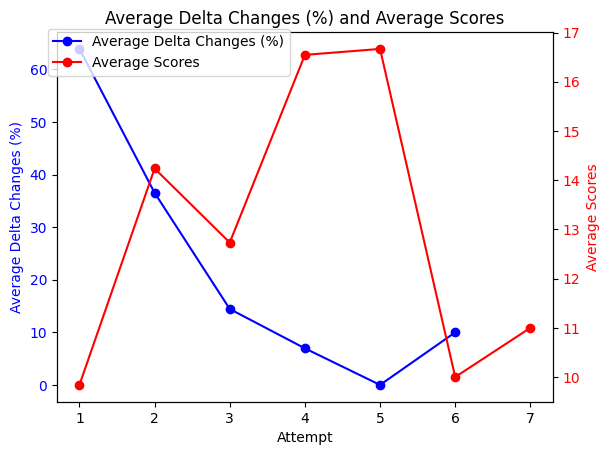

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Initialize variables to store the sum of delta changes and scores
sum_delta_changes_percentage = []
count_delta_changes = []
sum_scores = []
count_scores = []

# Iterate over each user in filtered_list
for user, assignments in filtered_list.items():
    for assignment, data in assignments.items():
        scores = data['scores']
        delta_changes_percentage = data['delta_changes_percentage']

        # Ensure the lists are long enough
        while len(sum_delta_changes_percentage) < len(delta_changes_percentage):
            sum_delta_changes_percentage.append(0)
            count_delta_changes.append(0)
        while len(sum_scores) < len(scores):
            sum_scores.append(0)
            count_scores.append(0)

        # Sum delta changes percentage
        for i, delta in enumerate(delta_changes_percentage):
            sum_delta_changes_percentage[i] += delta
            count_delta_changes[i] += 1

        # Sum scores
        for i, score in enumerate(scores):
            sum_scores[i] += score
            count_scores[i] += 1

# Calculate average delta changes percentage
average_delta_changes_percentage = [
    sum_delta_changes_percentage[i] / count_delta_changes[i] if count_delta_changes[i] > 0 else 0
    for i in range(len(sum_delta_changes_percentage))
]

# Calculate average scores
average_scores = [
    sum_scores[i] / count_scores[i] if count_scores[i] > 0 else 0
    for i in range(len(sum_scores))
]

# Create a line graph
fig, ax1 = plt.subplots()

# Plot average delta changes percentage
ax1.plot(range(1, len(average_delta_changes_percentage) + 1), average_delta_changes_percentage, marker='o', color='b', label='Average Delta Changes (%)')
ax1.set_xlabel('Attempt')
ax1.set_ylabel('Average Delta Changes (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for average scores
ax2 = ax1.twinx()
ax2.plot(range(1, len(average_scores) + 1), average_scores, marker='o', color='r', label='Average Scores')
ax2.set_ylabel('Average Scores', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title and legend
plt.title('Average Delta Changes (%) and Average Scores')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Display the graph
plt.show()